In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import ast
import seaborn as sns
import kagglehub

In [ ]:
# Download Dataset
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

# Loading Dataset
df = pd.read_csv(f"{path}/Sample_Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# Check data types and nulls
df.isnull().sum()
df.duplicated().sum()

0

In [5]:
# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Add new date-related columns for analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%B')
df['Weekday'] = df['Order Date'].dt.day_name()

- Basic KPI Metrics

In [6]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Orders: 5009


- Sales Over Time

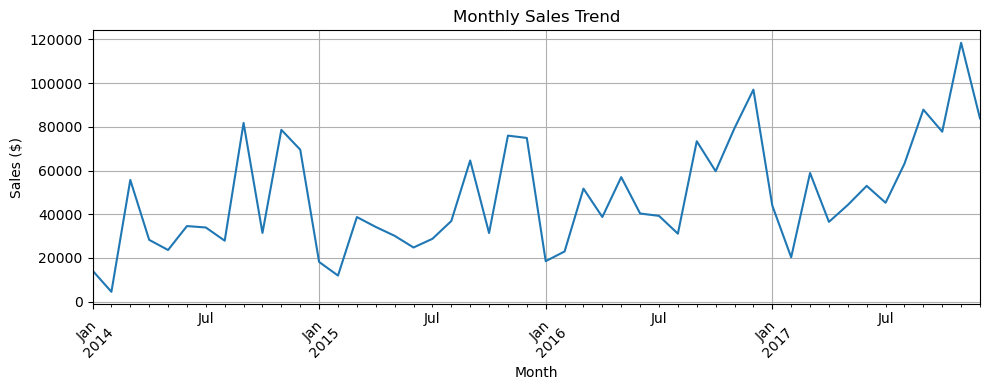

In [7]:
# Monthly sales trend
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(10, 4), title='Monthly Sales Trend')
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


- Sales by Region

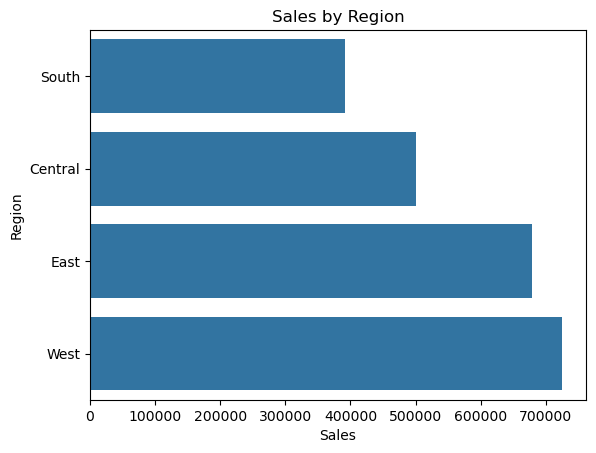

In [8]:
# Region-wise sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
sns.barplot(x=region_sales.values, y=region_sales.index)
plt.title("Sales by Region")
plt.xlabel("Sales")
plt.show()

- Sales by Category

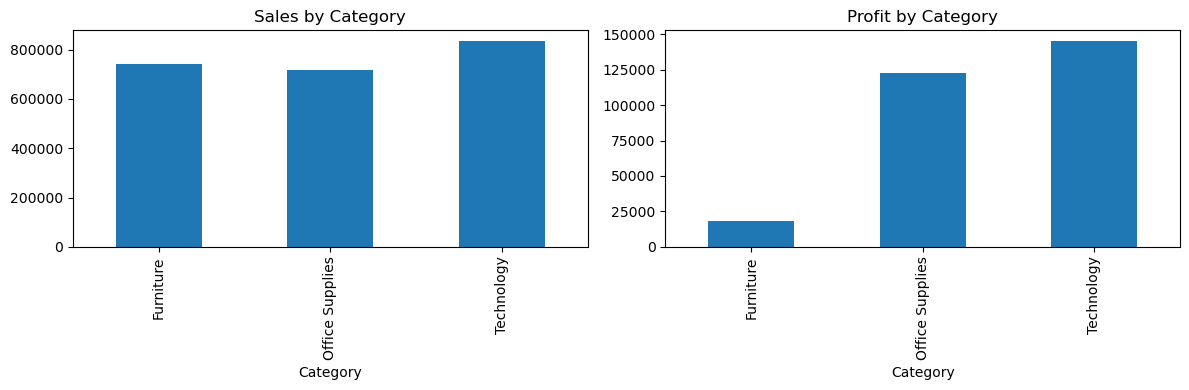

In [9]:
# Category performance
category_sales = df.groupby('Category')['Sales'].sum()
category_profit = df.groupby('Category')['Profit'].sum()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
category_sales.plot(kind='bar', ax=ax[0], title='Sales by Category')
category_profit.plot(kind='bar', ax=ax[1], title='Profit by Category')
plt.tight_layout()
plt.show()

- Products Performance


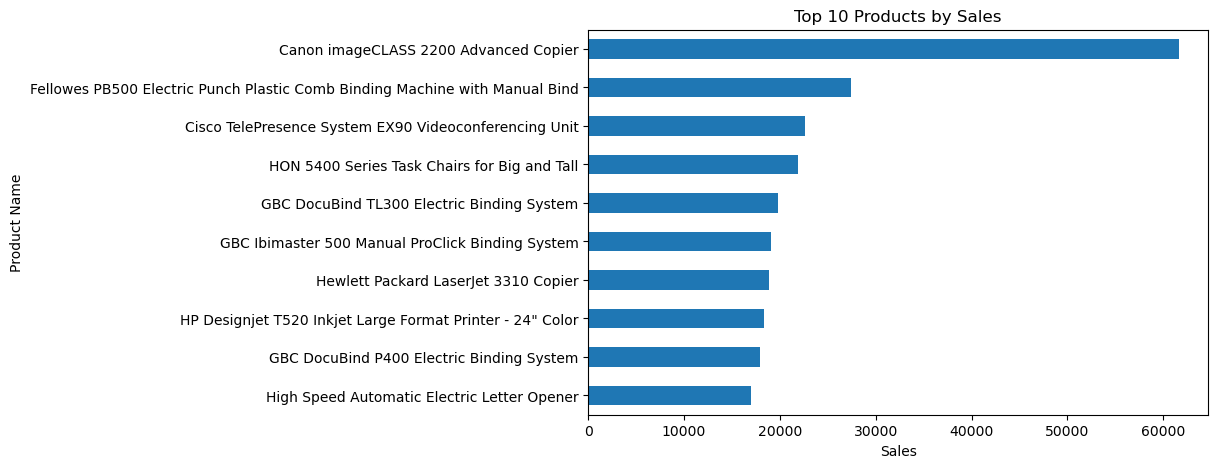

In [10]:
# Top 10 products
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Products by Sales', figsize=(8, 5))
plt.xlabel("Sales")
plt.gca().invert_yaxis()
plt.show()

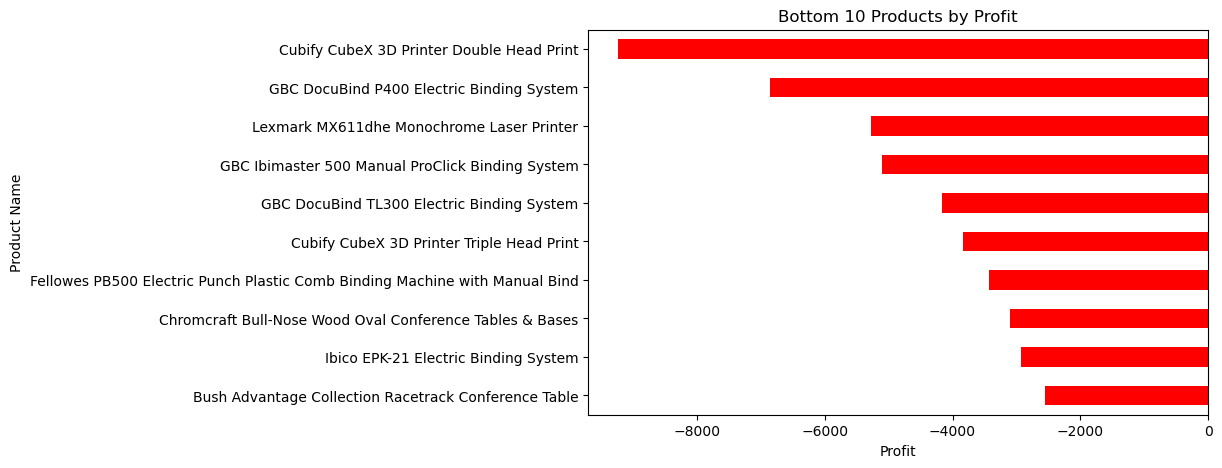

In [11]:
# Products with losses
loss_making = df[df['Profit'] < 0].groupby('Product Name')['Profit'].sum().sort_values().head(10)
loss_making.plot(kind='barh', title='Bottom 10 Products by Profit', figsize=(8, 5), color='red')
plt.xlabel("Profit")
plt.gca().invert_yaxis()
plt.show()

- Customer Segment Analysis

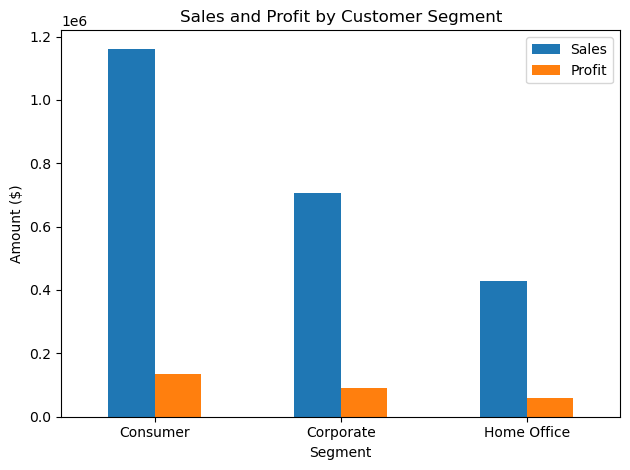

In [12]:
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].sum()
segment_analysis.plot(kind='bar', title='Sales and Profit by Customer Segment')
plt.ylabel("Amount ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- Forecasting with Rolling Average

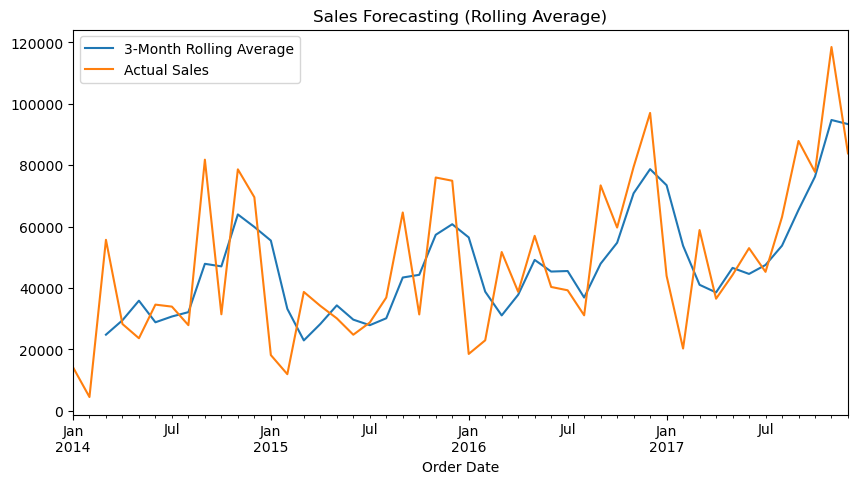

In [13]:
monthly_df = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_df = monthly_df.to_timestamp()

monthly_df.rolling(window=3).mean().plot(figsize=(10, 5), label='3-Month Rolling Average')
monthly_df.plot(label='Actual Sales')
plt.title("Sales Forecasting (Rolling Average)")
plt.legend()
plt.show()


In [14]:
# Export to CSV
df.to_csv("Superstore_Cleaned.csv", index=False)
print("✅ Data exported for Power BI!")

✅ Data exported for Power BI!


- RFM (Recency, Frequency, Monetary) Segmentation

In [15]:
# Reference date for Recency
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)

# RFM Table
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,   # Recency
    'Order ID': 'nunique',                                    # Frequency
    'Sales': 'sum'                                            # Monetary
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# RFM Scores
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

rfm['RFM_Score'] = rfm[['R','F','M']].astype(str).agg(''.join, axis=1)

# Export
rfm.to_csv("RFM_Segmentation.csv", index=False)
print("✅ RFM Segmentation file created!")


✅ RFM Segmentation file created!
